In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('./../data/SteelPlant.csv')
df.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [3]:
fault_types = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
df['Target']= df[fault_types].idxmax(axis=1)

In [4]:
df = df.drop(columns=fault_types)

In [5]:
df.head(2)

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Target
0,0,584,590,909972,909977,16,8,5,2274,113,...,1.00,1.0,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,Stains
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.25,1.0,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,Other_Faults


In [21]:
X = df.drop(columns=['Target'])
y = df['Target']

In [22]:
y.value_counts()

Target
Other_Faults    6540
Bumps           4761
K_Scatch        3431
Pastry          2284
Z_Scratch       1150
Stains           568
Dirtiness        485
Name: count, dtype: int64

Text(0.5, 1.0, 'visualize the class imbalance')

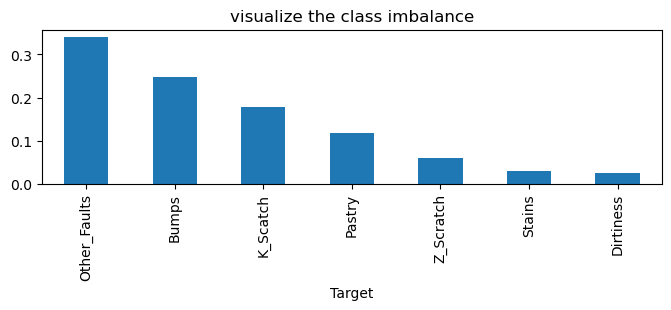

In [8]:
y.value_counts(normalize=True).plot(kind='bar', figsize=(8,2))
plt.title('visualize the class imbalance')

In [29]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)

In [16]:
y_sm.value_counts()

Target
Stains          6540
Other_Faults    6540
K_Scatch        6540
Bumps           6540
Pastry          6540
Z_Scratch       6540
Dirtiness       6540
Name: count, dtype: int64

Text(0.5, 1.0, 'visualize the class imbalance')

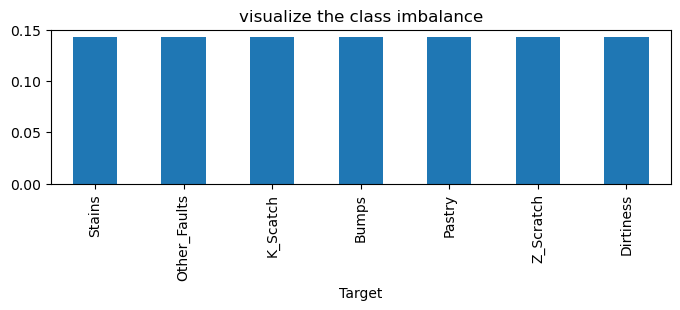

In [26]:
y_sm.value_counts(normalize=True).plot(kind='bar', figsize=(8,2))
plt.title('visualize the class imbalance')

In [30]:
X.shape, X_sm.shape

((19219, 28), (45780, 28))

# Q4. Comparing OOB Scores

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.33, random_state=42)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, train_size=.33, random_state=42)

In [47]:
clf = RandomForestClassifier(oob_score=True, random_state=42)

In [48]:
clf.fit(X_train, y_train) # on original

RandomForestClassifier(oob_score=True, random_state=42)

In [56]:
y_pred = clf.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       Bumps       0.48      0.51      0.50      3086
   Dirtiness       0.12      0.38      0.19       104
    K_Scatch       0.90      0.88      0.89      2294
Other_Faults       0.62      0.45      0.52      6098
      Pastry       0.10      0.41      0.16       377
      Stains       0.75      0.69      0.72       410
   Z_Scratch       0.42      0.65      0.51       508

    accuracy                           0.55     12877
   macro avg       0.49      0.57      0.50     12877
weighted avg       0.62      0.55      0.57     12877



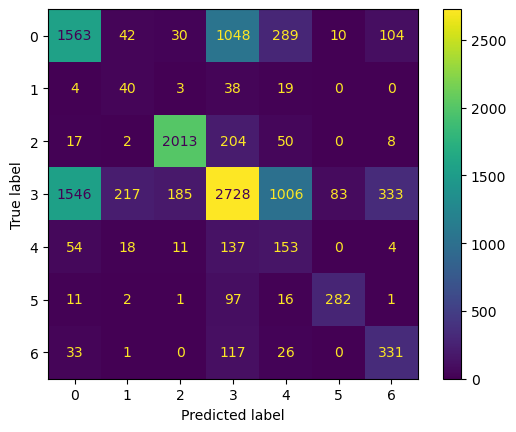

In [58]:
cm = confusion_matrix(y_pred, y_test)
ConfusionMatrixDisplay(cm).plot()

In [60]:
clf_sm = RandomForestClassifier(oob_score=True, random_state=42)
clf_sm.fit(X_train_sm, y_train_sm)
y_pred_sm = clf_sm.predict(X_test_sm)
print(classification_report(y_pred_sm, y_test_sm))

              precision    recall  f1-score   support

       Bumps       0.55      0.52      0.54      4609
   Dirtiness       0.92      0.75      0.83      5249
    K_Scatch       0.94      0.90      0.92      4501
Other_Faults       0.35      0.49      0.41      3157
      Pastry       0.55      0.65      0.59      3747
      Stains       0.99      0.94      0.97      4590
   Z_Scratch       0.91      0.84      0.87      4820

    accuracy                           0.74     30673
   macro avg       0.74      0.73      0.73     30673
weighted avg       0.77      0.74      0.75     30673



In [64]:
print(f'OOB socre orignal = {clf.oob_score_}, after resampling SMORE = {clf_sm.oob_score_}')

OOB socre orignal = 0.5466729738252917, after resampling SMORE = 0.7341629708082346


# Q5. Most Accurate Class

In [84]:
df_metrics_org = pd.DataFrame(classification_report(y_pred, y_test,  output_dict=True)).T

In [78]:
df_metrics = pd.DataFrame(classification_report(y_pred_sm, y_test_sm,  output_dict=True)).T

In [82]:
df_metrics.sort_values('recall', ascending=False)

,precision,recall,f1-score,support
Stains,0.989478,0.942484,0.965410,4590.000000
K_Scatch,0.936607,0.902688,0.919335,4501.000000
Z_Scratch,0.906820,0.835892,0.869913,4820.000000
Dirtiness,0.918831,0.754810,0.828784,5249.000000
accuracy,0.742021,0.742021,0.742021,0.742021
weighted avg,0.771129,0.742021,0.753052,30673.000000
macro avg,0.743056,0.727955,0.731687,30673.000000
Pastry,0.546559,0.648519,0.593189,3747.000000
Bumps,0.552771,0.521588,0.536727,4609.000000
Other_Faults,0.350329,0.489705,0.408454,3157.000000


Text(0.5, 1.0, 'clf metics imbalanced dataset')

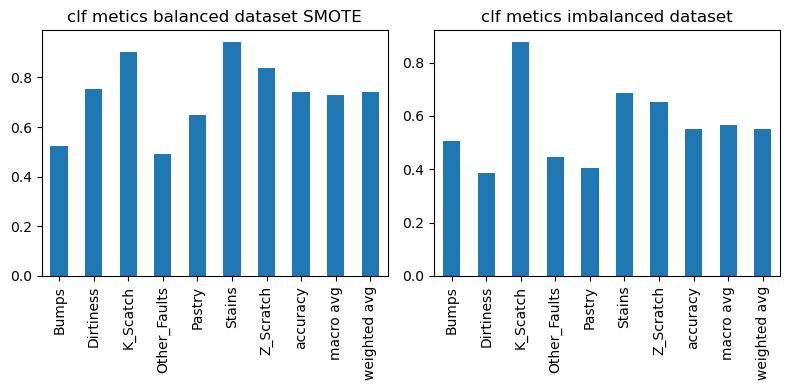

In [96]:
plt.figure(figsize=(8, 4), tight_layout= True)
plt.subplot(1, 2, 1)
df_metrics['recall'].plot(kind='bar')
plt.title('clf metics balanced dataset SMOTE')

plt.subplot(1, 2, 2)
df_metrics_org['recall'].plot(kind='bar')
plt.title('clf metics imbalanced dataset')

# Q7. Optimizing RandomForest

In [131]:
forest_clf = RandomForestClassifier( random_state=42, oob_score=True)

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_RandomGrid  = RandomizedSearchCV(forest_clf, params, n_iter=30 ,  cv=2,  verbose=6, random_state=42, n_jobs=-1 )
rf_RandomGrid.fit(X_train_sm, y_train_sm)

Fitting 2 folds for each of 30 candidates, totalling 60 fits


RandomizedSearchCV(cv=2,
                   estimator=RandomForestClassifier(oob_score=True,
                                                    random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, verbose=6)

In [130]:
rf_RandomGrid.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 30}

In [113]:
print("Best parameters found: ", rf_RandomGrid.best_params_)
print("Best cross-validation score achieved: ", rf_RandomGrid.best_score_)

Best parameters found:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Best cross-validation score achieved:  0.722049892523686


# Q8. RF for Feature Importance


In [122]:
rf_RandomGrid.feature_names_in_, rf_RandomGrid.

array(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity',
       'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400',
       'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index',
       'Square_Index', 'Outside_X_Index', 'Edges_X_Index',
       'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index',
       'Luminosity_Index', 'SigmoidOfAreas'], dtype=object)

In [123]:
feature_imp = pd.DataFrame({'feature_names_in_': rf_RandomGrid.best_estimator_.feature_names_in_, 
              'feature_importances_': rf_RandomGrid.best_estimator_.feature_importances_})
feature_imp.sort_values('feature_importances_', ascending=False)

,feature_names_in_,feature_importances_
22,LogOfAreas,0.073307
11,Length_of_Conveyer,0.071542
5,Pixels_Areas,0.056612
18,Outside_X_Index,0.056566
23,Log_X_Index,0.051719
14,Steel_Plate_Thickness,0.044495
6,X_Perimeter,0.040883
7,Y_Perimeter,0.040392
24,Log_Y_Index,0.037453
8,Sum_of_Luminosity,0.035652


The most important feature is: LogOfAreas with an importance score of: 0.0733


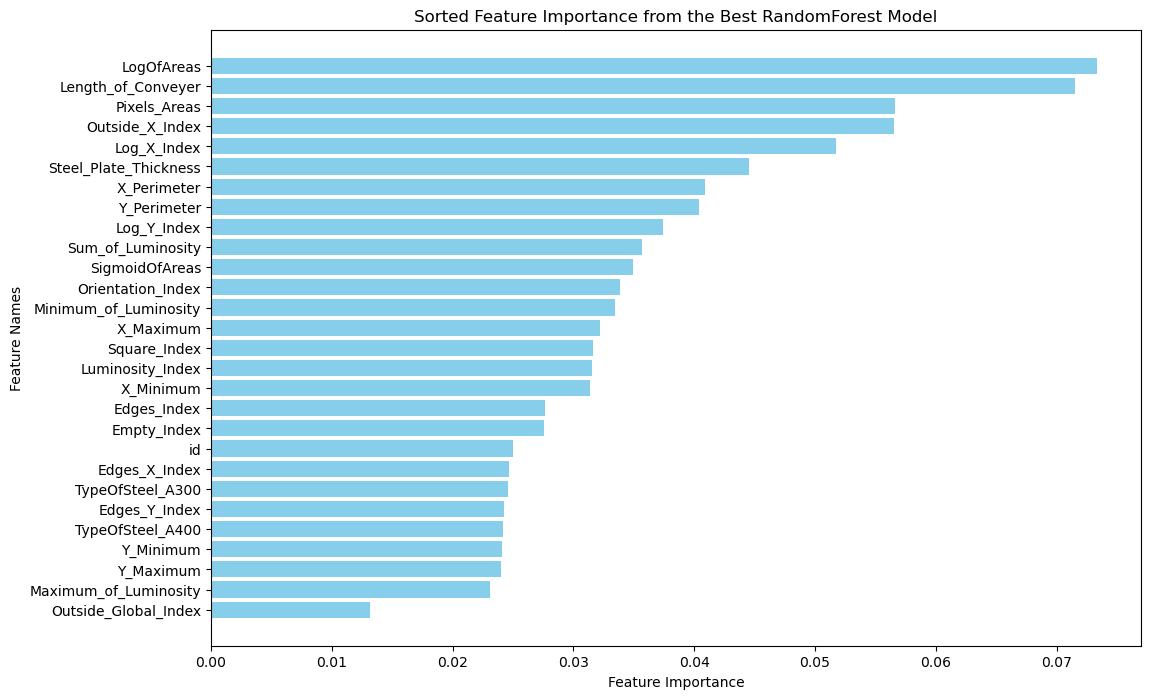

In [126]:
# Get the best RandomForest model from RandomizedSearchCV
best_rf_model = rf_RandomGrid.best_estimator_

# Get feature importances from the best model
feature_importances = best_rf_model.feature_importances_

# Get feature names
feature_names = X_train_sm.columns  # Adjust this if your feature names are stored differently

# Sort the features by their importance (and keep track of their names)
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Print the most important feature and its importance score
most_important_feature_name = sorted_feature_names[0]
print(f"The most important feature is: {most_important_feature_name} with an importance score of: {sorted_importances[0]:.4f}")

# Plot all feature importances sorted
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_importances)), sorted_importances, align='center', color='skyblue')
plt.yticks(range(len(sorted_importances)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Sorted Feature Importance from the Best RandomForest Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance on top
plt.show()